[[ 0.33082706  0.70913215  0.56305927  0.55220191  0.25898451]
 [ 0.73723256  0.92857647  0.0330278   0.30073602  0.05068254]
 [ 0.4094518   0.06555658  0.06021526  0.78132227  0.2043075 ]
 [ 0.01325438  0.92284933  0.90266378  0.64013407  0.25160573]]


<IPython.core.display.Javascript object>


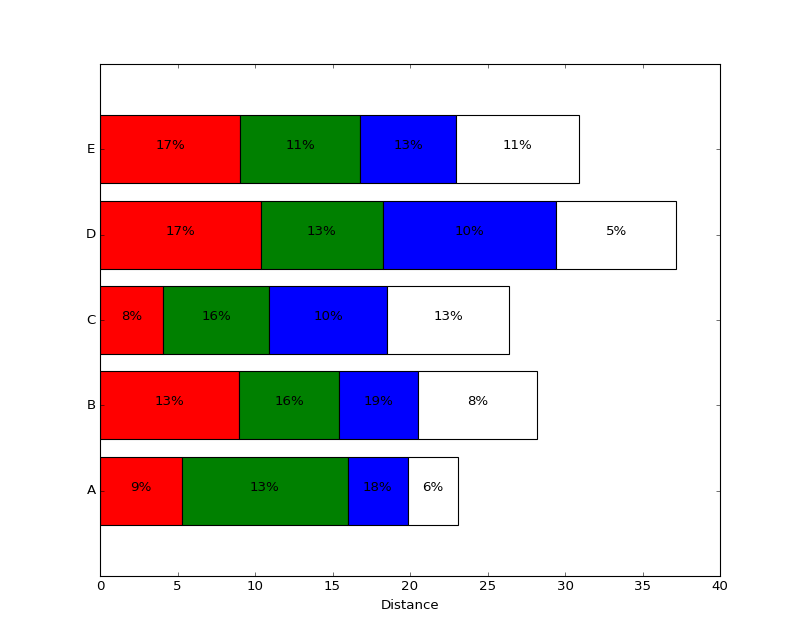

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

people = ('A','B','C','D','E')
segments = 4

numbars = len(people)

# generate some multi-dimensional data & arbitrary labels
print(np.random.rand(segments,numbars))
data = 3 + 10* np.random.rand(segments, numbars)
percentages = (np.random.randint(5,20, (numbars, segments)))
y_pos = np.arange(numbars)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

colors ='rgbwmc'
patch_handles = []
left = np.zeros(numbars) # left alignment of data starts at zero
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[i%len(colors)], align='center', left=left))
    # accumulate the left-hand offsets
    left += d

# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.set_xlabel('Distance')

plt.show()

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dados = pd.read_csv('../exemplo_4/table_w_tax.txt', delimiter='\t', header=1)

dados.taxonomy

0       k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...
1                                              Unassigned
2       k__Bacteria; p__OP8; c__OP8_1; o__; f__; g__; s__
3                                              Unassigned
4                                              Unassigned
5       k__Bacteria; p__Proteobacteria; c__Deltaproteo...
6                                              Unassigned
7       k__Bacteria; p__Proteobacteria; c__Deltaproteo...
8       k__Bacteria; p__Chloroflexi; c__Anaerolineae; ...
9       k__Bacteria; p__Chloroflexi; c__Dehalococcoide...
10                                             Unassigned
11      k__Bacteria; p__WS3; c__PRR-12; o__PBS-III-9; ...
12      k__Archaea; p__[Parvarchaeota]; c__[Parvarchae...
13      k__Bacteria; p__[Caldithrix]; c__KSB1; o__GW-2...
14      k__Archaea; p__Euryarchaeota; c__Thermoplasmat...
15      k__Archaea; p__Euryarchaeota; c__DSEG; o__ArcA...
16      k__Bacteria; p__Cyanobacteria; c__Synechococco...
17      k__Bac

In [5]:
dados = dados[dados.taxonomy != "Unassigned"].reset_index()
dados.head()

,level_0,index,#OTU ID,s140.assembled.fastq,s12.assembled.fastq,s14.assembled.fastq,s139.assembled.fastq,s13.assembled.fastq,s11.assembled.fastq,s10.assembled.fastq,s9.assembled.fastq,s16.assembled.fastq,s138.assembled.fastq,s15.assembled.fastq,s5.assembled.fastq,s7.assembled.fastq,s8.assembled.fastq,s6.assembled.fastq,s137.assembled.fastq,taxonomy
0,0,0,OTU26919915578250,3.0,2.0,1.0,8.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...
1,1,2,OTU77781940993588,3.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,k__Bacteria; p__OP8; c__OP8_1; o__; f__; g__; s__
2,2,5,OTU41933618273596,9.0,9.0,7.0,26.0,5.0,2.0,11.0,15.0,4.0,10.0,2.0,10.0,12.0,27.0,9.0,22.0,k__Bacteria; p__Proteobacteria; c__Deltaproteo...
3,3,7,OTU54631883164497,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,k__Bacteria; p__Proteobacteria; c__Deltaproteo...
4,4,8,OTU77504558290356,1.0,15.0,9.0,13.0,5.0,19.0,16.0,11.0,21.0,9.0,4.0,5.0,9.0,27.0,8.0,13.0,k__Bacteria; p__Chloroflexi; c__Anaerolineae; ...


In [6]:
indices_bacterias = dados[dados.taxonomy.str.contains("Bacteria")].index
print(indices_bacterias)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    8,   11,   12,
            ...
            1468, 1469, 1470, 1471, 1473, 1474, 1475, 1476, 1477, 1479],
           dtype='int64', length=1264)


In [7]:
bacterias = dados.loc[indices_bacterias]

In [8]:
indices_archaea = dados[dados.taxonomy.str.contains("Archaea")].index
print(indices_archaea)
archaea = dados.loc[indices_archaea, "taxonomy"]

Int64Index([   7,    9,   10,   23,   38,   46,   50,   54,   63,   64,
            ...
            1377, 1378, 1383, 1401, 1420, 1426, 1440, 1449, 1472, 1478],
           dtype='int64', length=216)


In [9]:
bacterias.head()

,level_0,index,#OTU ID,s140.assembled.fastq,s12.assembled.fastq,s14.assembled.fastq,s139.assembled.fastq,s13.assembled.fastq,s11.assembled.fastq,s10.assembled.fastq,s9.assembled.fastq,s16.assembled.fastq,s138.assembled.fastq,s15.assembled.fastq,s5.assembled.fastq,s7.assembled.fastq,s8.assembled.fastq,s6.assembled.fastq,s137.assembled.fastq,taxonomy
0,0,0,OTU26919915578250,3.0,2.0,1.0,8.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...
1,1,2,OTU77781940993588,3.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,k__Bacteria; p__OP8; c__OP8_1; o__; f__; g__; s__
2,2,5,OTU41933618273596,9.0,9.0,7.0,26.0,5.0,2.0,11.0,15.0,4.0,10.0,2.0,10.0,12.0,27.0,9.0,22.0,k__Bacteria; p__Proteobacteria; c__Deltaproteo...
3,3,7,OTU54631883164497,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,k__Bacteria; p__Proteobacteria; c__Deltaproteo...
4,4,8,OTU77504558290356,1.0,15.0,9.0,13.0,5.0,19.0,16.0,11.0,21.0,9.0,4.0,5.0,9.0,27.0,8.0,13.0,k__Bacteria; p__Chloroflexi; c__Anaerolineae; ...


In [10]:
bacterias["s140.assembled.fastq"].sum()

8466.0

In [11]:
bacterias[0:1].sum(axis=1)

0    21.0
dtype: float64

Descobrir quantos tipos diferentes de organismos existem nas amostras

In [20]:
taxonomia = pd.DataFrame(dados.taxonomy.str.split(";", 2).tolist(),columns = ["reino", "filo", "resto"])

In [21]:
taxonomia

,reino,filo,resto
0,k__Bacteria,p__Bacteroidetes,c__Bacteroidia; o__Bacteroidales; f__SB-1; g_...
1,k__Bacteria,p__OP8,c__OP8_1; o__; f__; g__; s__
2,k__Bacteria,p__Proteobacteria,c__Deltaproteobacteria; o__; f__; g__; s__
3,k__Bacteria,p__Proteobacteria,c__Deltaproteobacteria; o__Syntrophobacterale...
4,k__Bacteria,p__Chloroflexi,c__Anaerolineae; o__SB-34; f__; g__; s__
5,k__Bacteria,p__Chloroflexi,c__Dehalococcoidetes; o__Dehalococcoidales; f...
6,k__Bacteria,p__WS3,c__PRR-12; o__PBS-III-9; f__; g__; s__
7,k__Archaea,p__[Parvarchaeota],c__[Parvarchaea]; o__YLA114; f__; g__; s__
8,k__Bacteria,p__[Caldithrix],c__KSB1; o__GW-22; f__; g__; s__
9,k__Archaea,p__Euryarchaeota,c__Thermoplasmata; o__E2; f__DHVEG-1; g__; s__


In [22]:
taxonomia.filo.unique()

array([' p__Bacteroidetes', ' p__OP8', ' p__Proteobacteria',
       ' p__Chloroflexi', ' p__WS3', ' p__[Parvarchaeota]',
       ' p__[Caldithrix]', ' p__Euryarchaeota', ' p__Cyanobacteria',
       ' p__WS2', ' p__Acidobacteria', ' p__', ' p__KSB3', ' p__BHI80-139',
       ' p__Planctomycetes', ' p__NKB19', ' p__GN04', ' p__Spirochaetes',
       ' p__OP3', ' p__Gemmatimonadetes', ' p__Actinobacteria',
       ' p__Fibrobacteres', ' p__Caldithrix', ' p__Crenarchaeota',
       ' p__LCP-89', ' p__Nitrospirae', ' p__OP9', ' p__BRC1',
       ' p__Elusimicrobia', ' p__GN02', ' p__Chlorobi', ' p__AC1',
       ' p__SC4', ' p__TM6', ' p__OD1', ' p__LD1', ' p__Hyd24-12',
       ' p__Firmicutes', ' p__CD12', ' p__GOUTA4', ' p__SAR406',
       ' p__OP11', ' p__Verrucomicrobia', ' p__WPS-2', ' p__WWE1',
       ' p__OP1', ' p__Synergistetes'], dtype=object)